In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import theta
from sympy.plotting import plot
import sympy as sp
from sympy import init_printing
from IPython.display import display, Math
import sympy as sp
sp.init_printing()  # Ensures LaTe

init_printing(use_latex=True)
t_val = np.linspace(0, 10, 100)

# position 2D -> x(t), change in position with respect to time

#velocity


position 2D -> x(t), change in position with respect to time
velocity: the change is posistion with respect to time
dx/dt
accerleration: the change in velocity with respect to time
dx^2/dt^2


In [ ]:
t = sp.symbols('t')

x = t**3 -6*t**2-15*t + 40
plot(x,(t,0,10),title = "Position")
x_prime = sp.diff(x, t)
sol = sp.solve(x_prime, t)
print(sol)
print("First Derivative:")
display(Math(r'\textcolor{white}{' + sp.latex(x_prime) + '}'))
plot(x_prime,(t,0,10),title = "Velocity")
displacement = sp.integrate(x_prime, (t, 0, 5))
print(f"displacement: {displacement}")
x_prime2 = sp.diff(x, t,2)
print("Second Derivative:")
display(Math(r'\textcolor{white}{' + sp.latex(x_prime2) + '}'))
plot(x_prime2,(t,0,10),title = "Acceleration")





In [ ]:
v = sp.lambdify(t, x_prime2,"numpy")
# plt.plot(t,v)

In [ ]:
v = sp.lambdify(t, x_prime)
plt.plot(t_val,v(t_val))

In [ ]:
from vpython import sphere, vector, rate

# Create central body (e.g., the Sun)
sun = sphere(pos=vector(0,0,0), radius=1, color=vector(1,1,0))

# Create orbiting planet
planet = sphere(pos=vector(5,0,0), radius=0.3, color=vector(0,0,1), make_trail=True)

# Orbital motion parameters
G = 1  # Gravitational constant (simplified)
M = 10  # Mass of the Sun
r = vector(5, 0, 0)  # Initial position
v = vector(0, 2, 0)  # Initial velocity
dt = 0.01  # Time step

# Animation loop
while True:
    rate(100)  # Control animation speed

    # Compute gravitational force
    F = -G * M * r.norm() / r.mag2

    # Update velocity and position
    v = v + F * dt
    r = r + v * dt
    planet.pos = r


In [ ]:
def circle_plot(r:int):
    x = []
    y = []
    theta_list = np.linspace(0,2*np.pi, 100)
    
    for theta in enumerate(theta_list):
        x.append(r * np.cos(theta))
        y.append(r * np.sin(theta))
    plt.plot(x,y)        
    

<class 'float'>
POS: [6741000.       0.       0.]


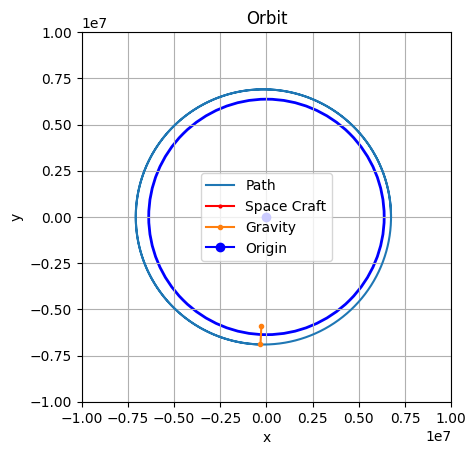

In [433]:

    

dt =.1
# sun_mass = float(1.989E30)
earth_radius = 6371E3
altitude = 370000
orbital_alt = altitude + earth_radius
earth_mass = float(5.972E24)
r = float(42164)
x = orbital_alt
y = 0
z = 0
G = float(6.67E-11)
satellite_pos = np.array([x, y, z])
satellite_velocity = 7778.496 # m/s
print(type(G))
gravity_unit_vec = np.array([-1, y/r, z/r])
satellite_velocity_vec = np.array([0, satellite_velocity, 0])
a = ((G*earth_mass)/orbital_alt**2) * gravity_unit_vec
# t = np.arange(0,100000,5)
x_pos_list = []
y_pos_list = []
print(f"POS: {satellite_pos}")
for _ in range(100000):
    # print(f"Gravity Vec: {gravity_unit_vec}")
    # print(f"Acceleration: {a}")
    a = ((G*earth_mass)/np.linalg.norm(satellite_pos)**2) * gravity_unit_vec
    # check = input("enter")
    # if check == "s":
    #     break
    satellite_velocity_vec = satellite_velocity_vec + a*dt
    # print(f"Velocity: {v}")
    satellite_pos += satellite_velocity_vec*dt
    # print(f"POS: {satellite_pos}")
    gravity_unit_vec = (np.array([0,0,0])-satellite_pos) / (np.linalg.norm(satellite_pos - np.array([0,0,0])))
    # print(f"new gravity Vec: {gravity_unit_vec}")
    # print(f"Gravity mag: {np.linalg.norm(gravity_unit_vec)}")
    x_pos_list.append(satellite_pos[0])
    y_pos_list.append(satellite_pos[1])
    

# Create figure and axis
fig, ax = plt.subplots()

# Plot orbit path
ax.plot(x_pos_list, y_pos_list, label="Path")
ax.plot(x_pos_list[-1], y_pos_list[-1], label="Space Craft",marker="o", markersize=2,color="red")
# Plot gravity vector
gravity_unit_vec = gravity_unit_vec*1000000
ax.plot([x_pos_list[-1], (x_pos_list[-1]+gravity_unit_vec[0])], [y_pos_list[-1],(y_pos_list[-1]+ gravity_unit_vec[1])], label="Gravity", marker='.')  # Scale for visibility


# Plot origin (Earth center)
ax.plot(0, 0, label="Origin", marker="o", markersize=6, color="blue")

# Add a circle for Earth
earth_circle = plt.Circle((0, 0), earth_radius, color='b', fill=False, linewidth=2)
ax.add_patch(earth_circle)  # Add circle to the axes

# Formatting
scale = 1e7
ax.set_xlim(-scale, scale)
ax.set_ylim(-scale, scale)
ax.set_aspect('equal')  # Ensure 1:1 aspect ratio
plt.grid()
plt.legend()
plt.title('Orbit')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [410]:
print(gravity_unit_vec)
print(x_pos_list[-1], y_pos_list[-1])
print([x_pos_list[-1], (x_pos_list[-1]+gravity_unit_vec[0])], [y_pos_list[-1],(y_pos_list[-1]+ gravity_unit_vec[1])])

[-6838.22026919  7296.48843966     0.        ]
4653603.509292997 -4965468.041635622
[np.float64(4653603.509292997), np.float64(4646765.28902381)] [np.float64(-4965468.041635622), np.float64(-4958171.553195964)]


In [272]:
# print(x_pos_list)
print(orbital_alt)


6408000.0
[np.float64(6371142.885322291), np.float64(6370897.756084956), np.float64(6370653.209202172), np.float64(6370409.640262229), np.float64(6370167.436956893), np.float64(6369926.976062078), np.float64(6369688.620619929), np.float64(6369452.717369237), np.float64(6369219.594463203), np.float64(6368989.559504699), np.float64(6368762.897919757), np.float64(6368539.871680562), np.float64(6368320.718380004), np.float64(6368105.650651281), np.float64(6367894.855918393), np.float64(6367688.496456836), np.float64(6367486.709738536), np.float64(6367289.6090310905), np.float64(6367097.284218772), np.float64(6366909.802811286), np.float64(6366727.211106036), np.float64(6366549.535470325), np.float64(6366376.783711454), np.float64(6366208.946504838), np.float64(6366045.998852888), np.float64(6365887.901550401), np.float64(6365734.602635274), np.float64(6365586.038806572), np.float64(6365442.136795066), np.float64(6365302.814674334), np.float64(6365167.983103271), np.float64(6365037.54649339

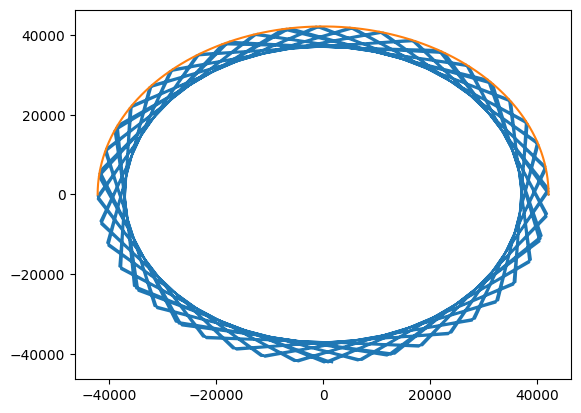

In [318]:


# theta_list = np.linspace(0, 2*np.pi, 100)
# print(theta_list)